In [433]:
import pandas as pd

In [434]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [435]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [436]:
# считаем все-все данные

In [437]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [438]:
train.shape

(15223, 52)

In [439]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [440]:
test.shape

(14910, 51)

In [441]:
# отделим таргет от TRAIN-а

In [442]:
y = train['TARGET']

In [443]:
train = train.drop('TARGET', axis=1)

In [444]:
# соеденим train и test

In [445]:
all_data = pd.concat([train, test])

In [446]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [447]:
# посмотрим типы данных и их заполняемость

In [448]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [449]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [450]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Ученая степень', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Высшее', 'Неоконченное высшее', 'Среднее'}

MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Юридические услуги/нотариальные услуги', 'Наука', 'Образование', 'Торговля', 'Нефтегазовая промышленность', 'Здравоохранение', 'Недвижимость', 'Сельское хозяйство', 'Сборочные производства', 'Управляющая компания', 'Логистика', 'Информационные технологии', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'ЧОП/Детективная д-ть', 'Страхование', 'Развлечения/Искусство', 'Банк/Финансы', 'Информационные услуги', 'Транспорт', 'Подбор персонала', 'Коммунальное хоз-во/Дорожные службы', 'Туризм', 'Государственная служба', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Энергетика', 'Маркетинг', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Другие сферы'}

GEN_TITLE
{na

In [451]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [452]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [453]:
# причина же что использовалась запятая для разделения не целой части числа

In [454]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [455]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [456]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Ученая степень', 'Два и более высших образования', 'Среднее специальное', 'Неполное среднее', 'Высшее', 'Неоконченное высшее', 'Среднее'}

MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Разведен(а)', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Юридические услуги/нотариальные услуги', 'Наука', 'Образование', 'Торговля', 'Нефтегазовая промышленность', 'Здравоохранение', 'Недвижимость', 'Сельское хозяйство', 'Сборочные производства', 'Управляющая компания', 'Логистика', 'Информационные технологии', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'ЧОП/Детективная д-ть', 'Страхование', 'Развлечения/Искусство', 'Банк/Финансы', 'Информационные услуги', 'Транспорт', 'Подбор персонала', 'Коммунальное хоз-во/Дорожные службы', 'Туризм', 'Государственная служба', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Энергетика', 'Маркетинг', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Другие сферы'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [457]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [458]:
all_data.WORK_TIME[all_data.WORK_TIME.isnull()] = all_data.WORK_TIME.median()
all_data.PREVIOUS_CARD_NUM_UTILIZED[all_data.PREVIOUS_CARD_NUM_UTILIZED.isnull()] = 0
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [459]:
all_data = all_data.drop(['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL','JOB_DIR'], axis=1)

In [460]:
dct={'от 5000 до 10000 руб.':1, 'до 5000 руб.':2, 'свыше 50000 руб.':3, 'от 10000 до 20000 руб.':4, 'от 20000 до 50000 руб.':5}
all_data['FAMILY_INCOME']=all_data['FAMILY_INCOME'].map(dct)



In [461]:
all_data = pd.get_dummies(all_data, columns=['EDUCATION', 'MARITAL_STATUS'],drop_first=True)

In [462]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 54 columns):
AGREEMENT_RK                                30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
FAMILY_INCOME                               30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_ADDRESS_PROVINCE                        30133 non-null object
FACT_ADDRESS_PROVINCE                       30133 non-null object
POSTAL_ADDRESS_PROVINCE                     30133 non-null object
TP_PROVINCE                                 29543 non-null object
REGION_NM                               

In [466]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 54 columns):
AGREEMENT_RK                                30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
FAMILY_INCOME                               30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_ADDRESS_PROVINCE                        30133 non-null object
FACT_ADDRESS_PROVINCE                       30133 non-null object
POSTAL_ADDRESS_PROVINCE                     30133 non-null object
TP_PROVINCE                                 29543 non-null object
REGION_NM                               

In [467]:
all_data = all_data.drop(['AGREEMENT_RK','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE','REGION_NM'],axis=1)

In [470]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train_p=all_data.iloc[:15223]
test_p=all_data.iloc[15223:]

In [471]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 48 columns):
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
FAMILY_INCOME                               30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_FACT_FL                                 30133 non-null int64
FACT_POST_FL                                30133 non-null int64
REG_POST_FL                                 30133 non-null int64
REG_FACT_POST_FL                            30133 non-null int64
REG_FACT_POST_TP_FL                         30133 non-null int64
FL_PRESENCE_FL                              

In [472]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(train_p, y, test_size=0.3, random_state=30)

In [473]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 8476 to 5925
Data columns (total 48 columns):
AGE                                         10656 non-null int64
SOCSTATUS_WORK_FL                           10656 non-null int64
SOCSTATUS_PENS_FL                           10656 non-null int64
GENDER                                      10656 non-null int64
CHILD_TOTAL                                 10656 non-null int64
DEPENDANTS                                  10656 non-null int64
FAMILY_INCOME                               10656 non-null int64
PERSONAL_INCOME                             10656 non-null float64
REG_FACT_FL                                 10656 non-null int64
FACT_POST_FL                                10656 non-null int64
REG_POST_FL                                 10656 non-null int64
REG_FACT_POST_FL                            10656 non-null int64
REG_FACT_POST_TP_FL                         10656 non-null int64
FL_PRESENCE_FL                            

In [496]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import numpy as np
# Ваш код :-)



In [490]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_DTC_P = dtc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.28125
recall 0.0163636363636
accuracy 0.876505364572
f1 0.0309278350515


In [491]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_RFC_P = rfc.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.28125
recall 0.0163636363636
accuracy 0.876505364572
f1 0.0309278350515


In [492]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
predict_LR_P = lg.predict(X_test)

print('precision', precision_score(y_test, predict))
print('recall', recall_score(y_test, predict))
print('accuracy', accuracy_score(y_test, predict))
print('f1', f1_score(y_test, predict))

precision 0.28125
recall 0.0163636363636
accuracy 0.876505364572
f1 0.0309278350515


In [479]:
# Посчитать метрики стандартные
# accuracy, precision, recall

# Ваш код :-)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


(-0.01, 1.01)

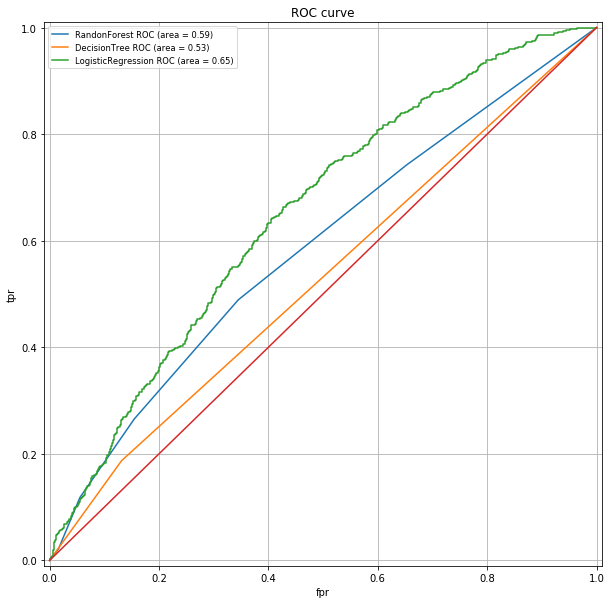

In [507]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
predict_RFC_PR = rfc.predict_proba(X_test)
predict_DTC_PR = dtc.predict_proba(X_test)
predict_LG_PR = lg.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, predict_RFC_PR[:,1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('RandonForest',auc(fpr, tpr)))

fpr, tpr, thresholds = roc_curve(y_test, predict_DTC_PR[:,1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('DecisionTree',auc(fpr, tpr)))

fpr, tpr, thresholds = roc_curve(y_test, predict_LG_PR[:,1])
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('LogisticRegression',auc(fpr, tpr)))


plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend(loc=0, fontsize='small')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [545]:
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
itog_scores ={}

dtc = DecisionTreeClassifier()
scores_dtc=cross_val_score(dtc, train_p, y, scoring='roc_auc',cv=10)
itog_scores['DecisionTreeClassifier']=scores_dtc.mean()

rfc = RandomForestClassifier()
scores_rfc=cross_val_score(rfc, train_p, y, scoring='roc_auc',cv=10)
itog_scores['RandomForestClassifier']=scores_rfc.mean()

lg = LogisticRegression()
scores_lg=cross_val_score(lg, train_p, y, scoring='roc_auc',cv=10)
itog_scores['LogisticRegression']=scores_lg.mean()


# Ваш код :-)`

In [554]:
itog_scores

{'DecisionTreeClassifier': 0.51883347716844164,
 'LogisticRegression': 0.64311063075423069,
 'RandomForestClassifier': 0.60788861164642494}

In [555]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)

In [556]:
lg.fit(train_p, y)
predict_LG_PR_t = lg.predict_proba(test_p)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [557]:
predict_LG_PR_t

array([[ 0.87821504,  0.12178496],
       [ 0.94145091,  0.05854909],
       [ 0.83412692,  0.16587308],
       ..., 
       [ 0.87096413,  0.12903587],
       [ 0.89650953,  0.10349047],
       [ 0.82689334,  0.17310666]])